<a href="https://colab.research.google.com/github/FatimaShenno/ML-Project/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures,MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

# **Get the Data**

In [ ]:
music = pd.read_csv("/content/train.csv")
music.head(5)

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0,0.0445,0.8090,0.000006,0.2360,0.802,177.164,5.209333,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1,0.3880,0.4160,NaN,0.1160,0.688,99.517,206602.000000,4,5
2,2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.0487,0.021500,0.1160,0.784,80.425,218960.000000,4,6
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0,0.0481,0.8340,NaN,0.0963,0.324,96.139,332467.000000,3,9
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.5170,0.106000,0.1640,0.510,71.548,200173.000000,4,1


*   Id - an arbitrary unique track identifier

*   Artist Name - singer or band

*   Track Name - track title

*  bpm - beats per minute (tempo)

*  energy: the higher the value the more energetic

*  key - keys on an octave encoded as integers in (C = 0, C# = 1, etc.)

*   danceability: the higher the value, the easier it is to dance to this song

*   loudness (dB): the higher the value, the louder the song

*   mode: Mode indicates the modality (major or minor) of a track.Major is represented by 1 and minor is 0

*   liveness: the higher the value, the more likely the song is alive recording

*   valence: the higher the value, the more positive mood for the song

*   duration: the length of the song

*   acousticness: the higher the value the more acoustic the song is

*   speechiness: the higher the value the more spoken word the song contains

*   popularity: the higher the value the more popular the song is

*   class - genre of the track and (the target variable for this problem)
























# **Data Discovery**




 **Drop unuseful columns** 

In [ ]:
music.shape

(14396, 18)

In [ ]:
music.drop(columns = ["id","Artist Name","Track Name"],inplace = True )

In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          14045 non-null  float64
 1   danceability        14396 non-null  float64
 2   energy              14396 non-null  float64
 3   key                 12784 non-null  float64
 4   loudness            14396 non-null  float64
 5   mode                14396 non-null  int64  
 6   speechiness         14396 non-null  float64
 7   acousticness        14396 non-null  float64
 8   instrumentalness    10837 non-null  float64
 9   liveness            14396 non-null  float64
 10  valence             14396 non-null  float64
 11  tempo               14396 non-null  float64
 12  duration_in min/ms  14396 non-null  float64
 13  time_signature      14396 non-null  int64  
 14  Class               14396 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 1.6 MB


In [ ]:
music["key"] = music["key"].astype("object")
music["mode"] = music["mode"].astype("object")
music["Class"] = music["Class"].astype("object")

* some columns should be changed its datatypes, such as mode, key, and class 

In [ ]:
music.describe()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,14045.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,10837.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000
mean,44.591954,0.542981,0.663347,-7.897393,0.079479,0.246606,0.177489,0.195594,0.486931,122.729981,2.009550e+05,3.927341
std,17.436540,0.166668,0.235709,4.063214,0.083048,0.310371,0.304133,0.158487,0.240281,29.558253,1.118463e+05,0.352828
min,1.000000,0.059600,0.000020,-39.952000,0.022500,0.000000,0.000001,0.013600,0.018300,34.132000,5.339167e-01,1.000000
25%,33.000000,0.430000,0.510000,-9.525250,0.034800,0.004208,0.000088,0.097400,0.299000,99.799000,1.669988e+05,4.000000
50%,44.000000,0.545000,0.701000,-7.006000,0.047400,0.080750,0.003920,0.129000,0.481000,120.069500,2.095845e+05,4.000000
75%,56.000000,0.659000,0.861000,-5.161000,0.082500,0.434000,0.199000,0.257000,0.673000,141.990250,2.522970e+05,4.000000
max,100.000000,0.989000,0.999000,1.355000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


* there is a faulty  values in acousticness column



In [ ]:
music.describe(include = "O")

,key,mode,Class
count,12784.0,14396,14396
unique,11.0,2,11
top,7.0,1,10
freq,1684.0,9193,3959


In [ ]:
music.isna().sum().sort_values(ascending = False)

instrumentalness      3559
key                   1612
Popularity             351
danceability             0
energy                   0
loudness                 0
mode                     0
speechiness              0
acousticness             0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
music.duplicated().sum()

29

* There are 29 rows duplicated

In [ ]:
music.drop_duplicates(inplace = True )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a0c4d6df0>,
      dtype=object)

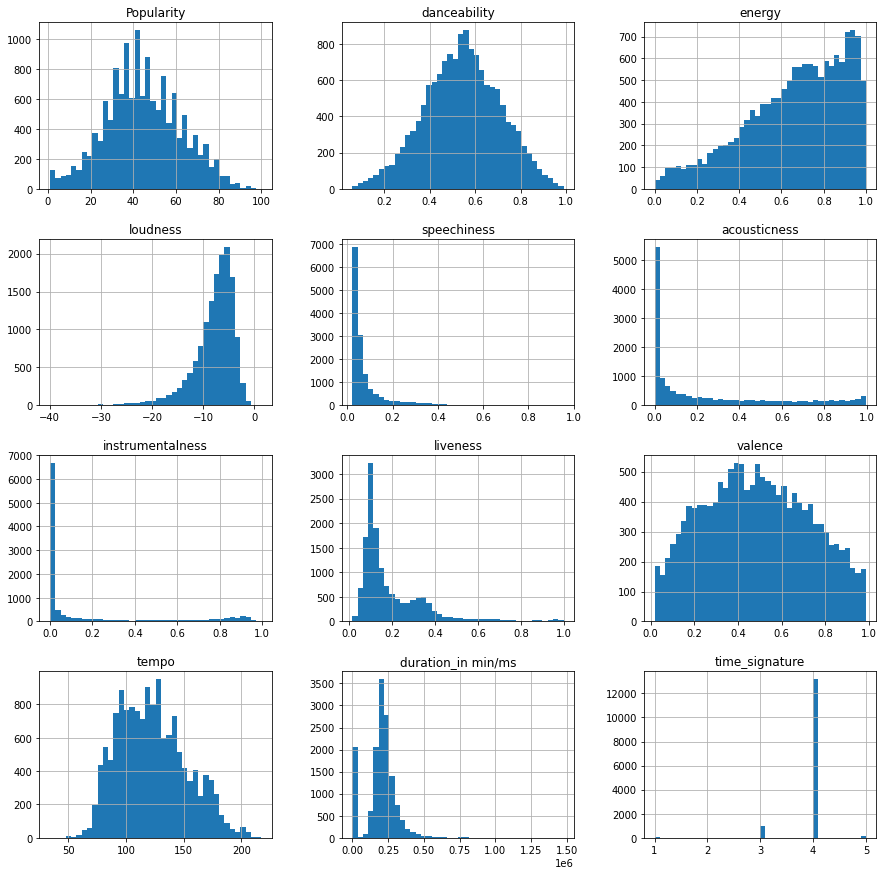

In [ ]:
music.hist(bins = 40 , figsize = (15,15))

* Some columns are skewed, so we have to do some processing.


In [ ]:
music_cont = music.select_dtypes([int,float]) 

for i in music_cont.columns:
  print(f'Skewness in {i} =',music_cont[i].skew())

Skewness in Popularity = 0.08161272484711232
Skewness in danceability = -0.08288767433869461
Skewness in energy = -0.6674422622513343
Skewness in loudness = -1.777560925830212
Skewness in speechiness = 3.075811439525631
Skewness in acousticness = 1.1064742348936547
Skewness in instrumentalness = 1.531787053651494
Skewness in liveness = 2.1813991071421843
Skewness in valence = 0.09345903305377608
Skewness in tempo = 0.3808391096388975
Skewness in duration_in min/ms = 0.8312133152171077
Skewness in time_signature = -4.219046669662773


# **Data visualization**

## 1- Univariate Analysis

In [ ]:
music["Class"].nunique()

11

In [ ]:
music["Class"].value_counts().sort_values(ascending = False)

10    3946
6     2066
9     2017
8     1479
5     1156
1     1095
2     1015
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

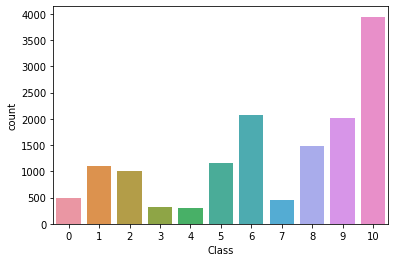

In [ ]:
sns.countplot(x='Class', data=music)

* From plot , Class 10 has largest number of instances followed by class 6 and class 9.

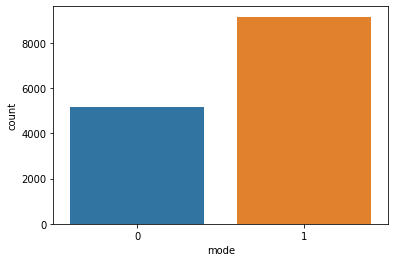

In [ ]:
sns.countplot(x='mode', data=music)

* Most tracks in data are Major

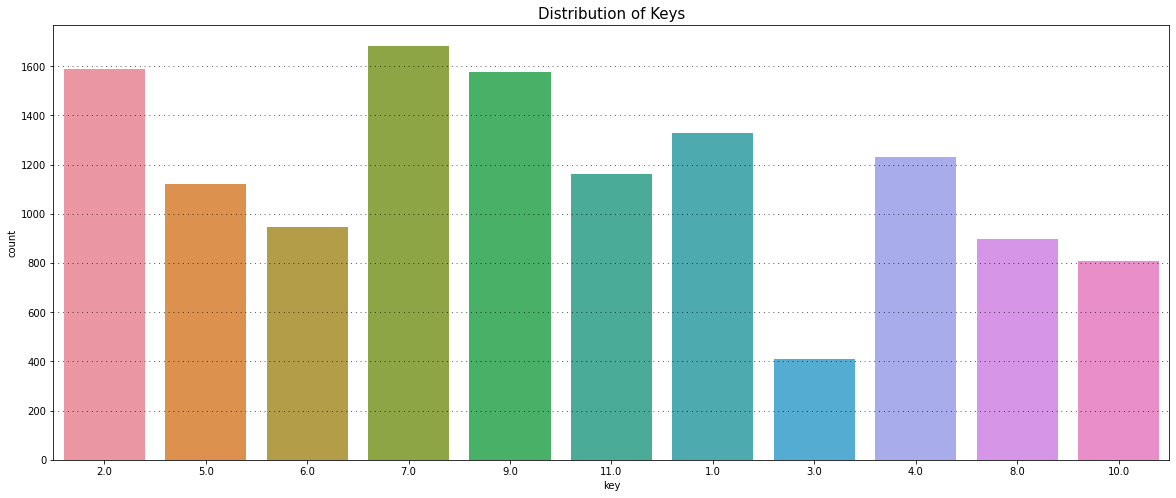

In [ ]:
fig = plt.figure(figsize=(20, 8), facecolor='white')
gs = fig.add_gridspec(1, 1)

ax = fig.add_subplot(gs[0, 0])

ax.set_title('Distribution of Keys', fontsize=15)

ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sns.countplot(x = 'key', data = music)

* From the plot, Key 7 has the most significant number of instances followed by class 2 and class 9.

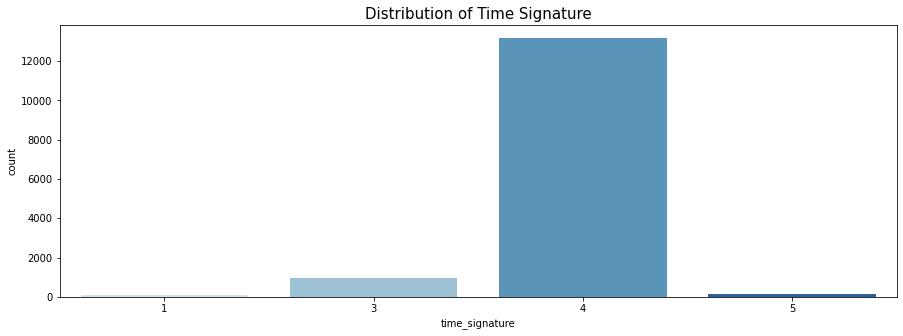

In [ ]:
fig = plt.figure(figsize=(15, 5), facecolor='white')
gs = fig.add_gridspec(1, 1)

ax = fig.add_subplot(gs[0, 0])
ax.set_title('Distribution of Time Signature', fontsize=15)
sns.countplot(x = 'time_signature', data = music, zorder=2,alpha=1,
              palette ="Blues")
plt.show()

* About '85% of the songs have a time signature of 4.

In [ ]:
time_data = pd.DataFrame(music['time_signature'].value_counts().sort_index()).reset_index().rename({'index':'time_signature', 'time_signature': 'count'},
                                                                                                   axis=1)

time_data

,time_signature,count
0,1,84
1,3,950
2,4,13174
3,5,159


In [ ]:
num_atr = music.select_dtypes([int,float])

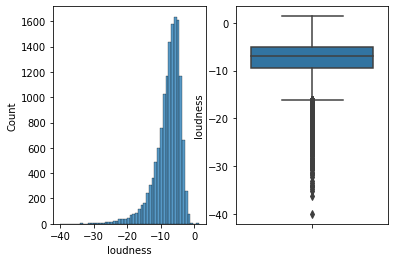

In [ ]:
plt.subplot(121)
sns.histplot(x = "loudness" , data = music, bins = 50)
plt.subplot(122)
sns.boxplot(y ="loudness", data = music)

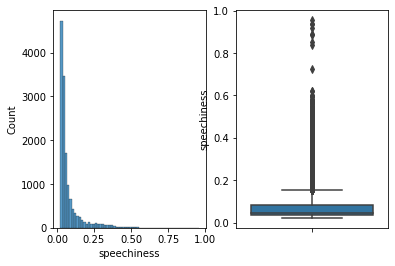

In [ ]:

plt.subplot(121)
sns.histplot(x = "speechiness" , data = music, bins = 60)
plt.subplot(122)
sns.boxplot(y ="speechiness", data = music)

* From the plots, there are possibly some outliers.

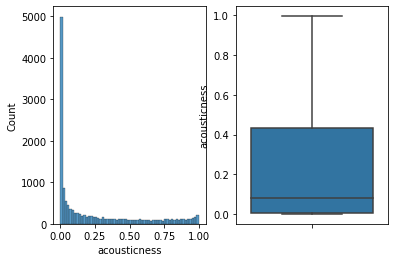

In [ ]:
plt.subplot(121)
sns.histplot(x = "acousticness" , data = music, bins = 60)
plt.subplot(122)
sns.boxplot(y = "acousticness" , data = music)


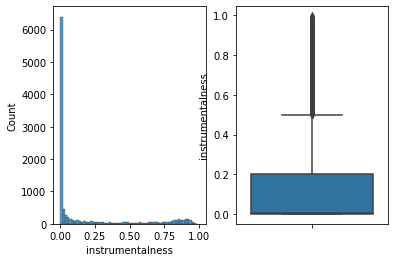

In [ ]:
plt.subplot(121)
sns.histplot(x = "instrumentalness" , data = music, bins = 60)
plt.subplot(122)
sns.boxplot(y = "instrumentalness" , data = music)

## 2- Bivariate Analysis

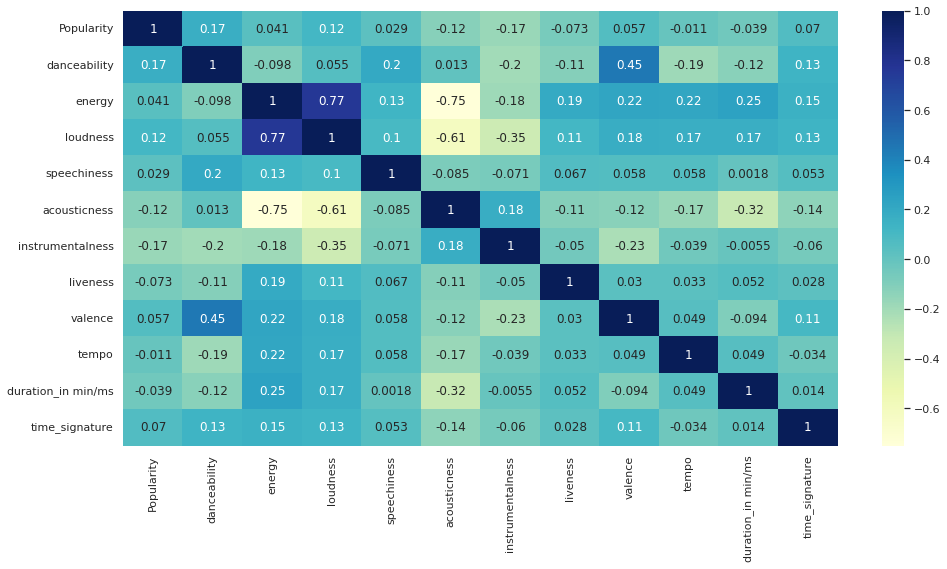

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = music.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

Text(0.5, 1.0, 'Mean Energy for Song Class')

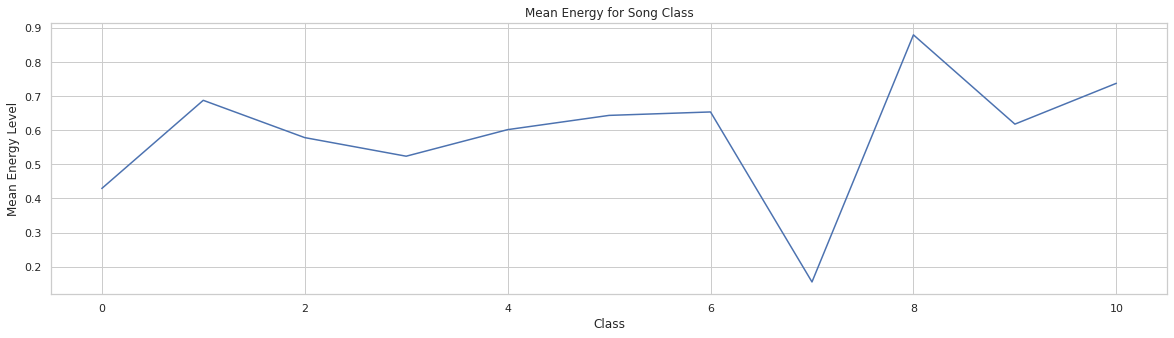

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

x = music.groupby("Class")["energy"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('Mean Energy Level')
axis.set_xlabel('Class')
axis.set_title("Mean Energy for Song Class")

Text(0.5, 1.0, 'Mean Livness for Song Class')

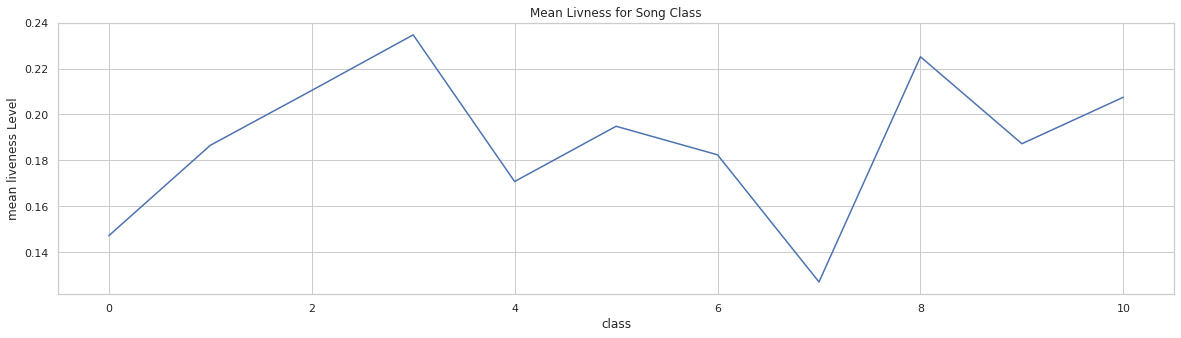

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

x = music.groupby("Class")["liveness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness Level')
axis.set_xlabel('class')
axis.set_title("Mean Livness for Song Class")

Text(0.5, 1.0, 'Mean Loudness for Song Class')

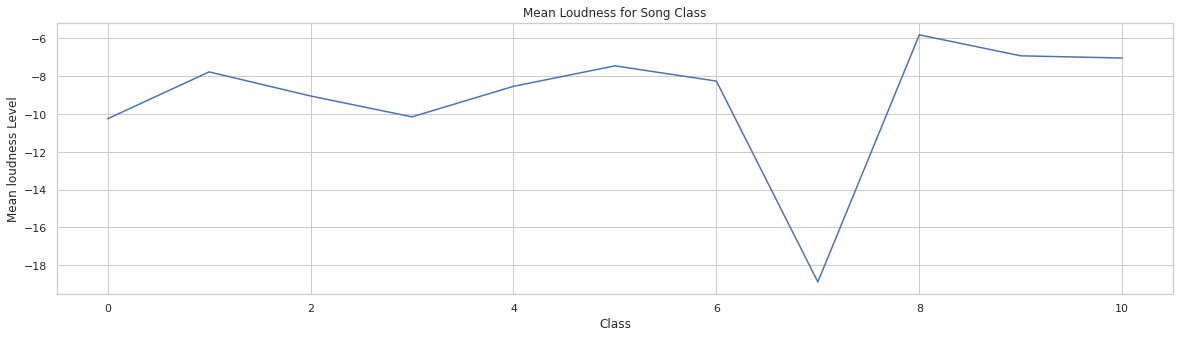

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

x = music.groupby("Class")["loudness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('Mean loudness Level')
axis.set_xlabel('Class')
axis.set_title("Mean Loudness for Song Class")

Text(0.5, 1.0, 'valence vs danceability')

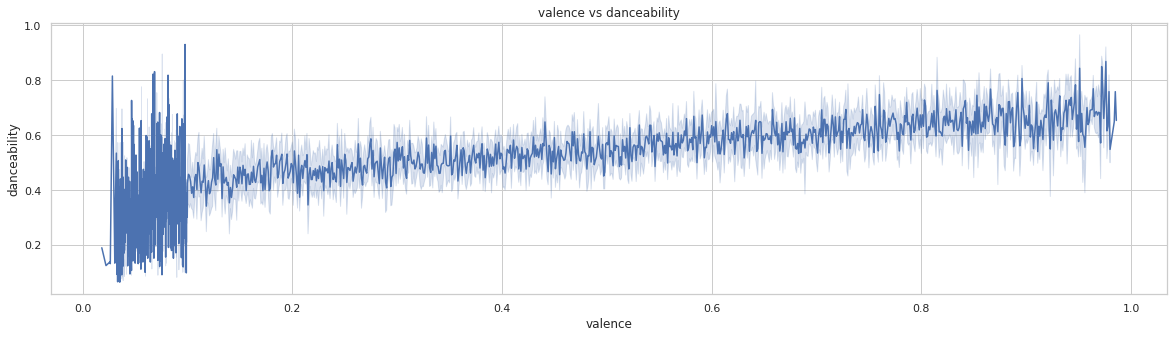

In [ ]:
plt.figure(figsize=(20, 5))
axis = sns.lineplot(x="valence", y="danceability" , data = music )
axis.set_xlabel('valence')
axis.set_ylabel('danceability')
axis.set_title("valence vs danceability")

Text(0.5, 1.0, 'energy vs loudness')

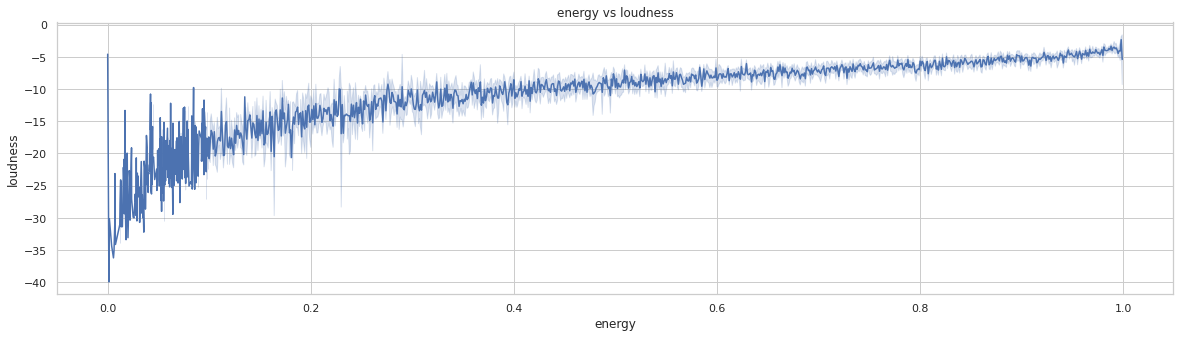

In [ ]:
plt.figure(figsize=(20, 5))
axis = sns.lineplot(x="energy", y="loudness" , data = music )
axis.set_xlabel('energy')
axis.set_ylabel('loudness')
axis.set_title("energy vs loudness")

# **Data Preprocessing**

# 1- Imputing NaN values & Feature Scaling

In [ ]:
num_attr = music.select_dtypes([int,float]) 

In [ ]:
num_pipe = Pipeline([("imp",SimpleImputer(missing_values = np.nan, strategy = 'median')),
                     ("scaler",MinMaxScaler())
                    ])

In [ ]:
obj_attr =music.select_dtypes(object) 
obj_attr.drop(columns = "Class",axis = 1,inplace = True )

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
obj_pipe = Pipeline([("imp",SimpleImputer(missing_values = np.nan, strategy = 'most_frequent'))])

# 2- Transformation Pipelines

In [ ]:
full_transform = ColumnTransformer([("num",num_pipe,list(num_attr)),
                                    ("obj",obj_pipe,list(obj_attr))
                                   ])
full_transform

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Popularity', 'danceability', 'energy',
                                  'loudness', 'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'duration_in min/ms',
                                  'time_signature']),
                                ('obj',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['key', 'mode'])])

**Fit and transform full_pipeline with music data then saved it in music_prepared**

In [ ]:
X= music.drop(columns=["Class"], axis=1)
y = music["Class"]

In [ ]:
music_prepared = full_transform.fit_transform(X)
music_prepared.shape

(14367, 14)

In [ ]:
music_prepared = pd.DataFrame(music_prepared, columns = X.columns)

**Music dataset after transforming**

In [ ]:
music_prepared.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.222222,0.333979,0.670664,0.700729,0.023592,0.812249,0.000005,0.225466,0.809858,0.780385,0.000003,0.5,7.0,0
1,0.444444,0.644932,0.639632,0.770184,0.391957,0.417671,0.003925,0.103812,0.692053,0.356741,0.139861,0.75,6.0,1
2,0.505051,0.428664,0.731726,0.675503,0.131367,0.048896,0.021585,0.103812,0.791258,0.252575,0.148227,0.75,11.0,0
3,0.393939,0.482462,0.287273,0.751785,0.027453,0.837349,0.003925,0.08384,0.315904,0.338311,0.225067,0.5,5.0,0
4,0.626263,0.529804,0.485475,0.746629,0.011475,0.519076,0.106425,0.152474,0.508112,0.204142,0.135509,0.75,9.0,1


In [ ]:
music_cont = music_prepared.select_dtypes([int,float]) 

fig = plt.figure(figsize=(15, 18)) 
for i,columns in enumerate(music_cont.columns, 1): 
    ax = plt.subplot(5,3,i)
    sns.kdeplot(x=music_cont[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()

<Figure size 1080x1296 with 0 Axes>

In [ ]:
for i in music_cont.columns:
  print(f'Skewness in {i} =',music_cont[i].skew())

# **Build machine learning model**

In [ ]:
y = y.astype("int")
X_train, X_val, y_train, y_val = train_test_split(music_prepared, y, 
                                                  test_size=0.3, 
                                                  random_state= 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

train_accuracy=[]
val_accuracy=[]
classifiers=['Logistic Regression','SVM','Decision Tree', 'Random forest']

models=[SVC(kernel="poly", degree=3, coef0=1, C=5),
        LogisticRegression(multi_class="multinomial",solver='sag',max_iter=1000,
                           tol=0.0001,C = 100),
        DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=200,random_state=42)]

for i in models:
    model = i
    model.fit(X_train , y_train)
    T_pred=model.predict(X_train)
    train_accuracy.append(accuracy_score(T_pred,y_train))

    V_pred=model.predict(X_val)
    val_accuracy.append(accuracy_score(V_pred,y_val))
    
models_dataframe1 = pd.DataFrame({"Train Accuracy" :train_accuracy,
                                  "Val Accuracy" :val_accuracy} ,index=classifiers) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
models_dataframe1

,Train Accuracy,Val Accuracy
Logistic Regression,0.500000,0.487358
SVM,0.495028,0.495941
Decision Tree,0.940931,0.376479
Random forest,0.940931,0.514730


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

accuracy=[]
classifiers=['Logistic Regression','SVM','Decision Tree', 'Random forest']

models=[SVC(kernel="poly", degree=3, coef0=1, C=5),
        LogisticRegression(multi_class="multinomial",solver='sag',max_iter=1000,tol=0.0001,C = 100),
        DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=42)]

for i in models:
    model = i
    model.fit(music_prepared , y)
    predition = model.predict(music_prepared)
    accuracy.append(accuracy_score(predition,y))

    
models_dataframe2 = pd.DataFrame({"Accuracy" :accuracy} ,index=classifiers) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
models_dataframe2

,Accuracy
Logistic Regression,0.498712
SVM,0.498016
Decision Tree,0.918494
Random forest,0.918494


# Find accurcy using cross validation score

In [ ]:
result=[]

classifiers=['Logistic Regression','SVM','Decision Tree', 'Random forest']
models=[SVC(random_state=42,probability=True,kernel='rbf'),
        LogisticRegression(multi_class="multinomial",solver='sag',max_iter=1000,
                           tol=0.0001,C = 100),
        DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=42)]

for model in models:
    cv_result = cross_val_score(model, music_prepared, y, cv=3, 
                                scoring="accuracy")
    cv_result=cv_result
    result.append(cv_result.mean())

cv_models_dataframe=pd.DataFrame(result, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,CV Mean
Random forest,0.509292
SVM,0.492657
Logistic Regression,0.381151
Decision Tree,0.374539


# Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

rf_clf= RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf =SVC(random_state=42,probability=True,kernel='rbf')
lr = LogisticRegression(multi_class="multinomial",solver='sag',
                        max_iter=1000,tol=0.0001,C = 100)
ensemble_model = VotingClassifier(
    estimators=[('Random forest', rf_clf), ('SVM', svm_clf),
                ('Logistic Regression',lr)], voting='soft')

ensemble_model.fit(X_train , y_train)
predictEnsemble = ensemble_model.predict(X_val)




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print('Accuracy of ensembled model with all the 3 classifiers is:',accuracy_score(y_val, predictEnsemble))

Accuracy of ensembled model with all the 3 classifiers is: 0.5091626072836929


# Bagging and Cross validation

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_result =[]

rf_clf= RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf =SVC(random_state=42,probability=True,kernel='rbf')
lr = LogisticRegression(multi_class="multinomial",solver='sag',max_iter=1000,
                        tol=0.0001,C = 100)
dt_clf =DecisionTreeClassifier()

clf_array = [rf_clf,svm_clf, lr,dt_clf]

print("After Bagging: ")

for clf in clf_array:
    bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, 
                                    random_state=24,n_jobs=-1)
    bagging_scores = cross_val_score(bagging_clf, music_prepared, y, cv=3, 
                                     scoring="accuracy")
    bagging_scores= bagging_scores
    bagging_result.append(bagging_scores.mean())

cv_models_dataframe=pd.DataFrame(bagging_result, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

After Bagging: 


,CV Mean
Logistic Regression,0.518271
Decision Tree,0.482077
SVM,0.471984
Random forest,0.449154


# Voting after Bagging

In [ ]:
bagging_model = VotingClassifier(
    estimators=[('Random forest', rf_clf), ('SVM', svm_clf),
                ('Logistic Regression',lr)], voting='soft')

bagging_model.fit(X_train,y_train)
bag_pred = bagging_model.predict(X_val)

print('Accuracy of ensembled model with all the 3 Bagging classifiers is:', 
      accuracy_score(y_val, bag_pred))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy of ensembled model with all the 3 Bagging classifiers is: 0.5091626072836929


## **Error Analysis**

In [ ]:
RF_Cls = RandomForestClassifier(n_estimators=1000,random_state=42)
RF_Cls.fit (X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
predictions = RF_Cls.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val,predictions)
cm

array([[128,   0,   0,   5,   8,   0,   0,   2,   0,   9,   2],
       [  0,   6,   5,   0,   0,  17, 125,   0,  10,  21, 140],
       [  0,   0,  96,   0,   0,   7,  22,   0,   1,  39, 141],
       [ 19,   0,   0,  68,   3,   0,   0,   4,   0,   1,   0],
       [ 28,   0,   0,   2,  61,   0,   0,   1,   0,   6,   2],
       [  0,   1,   2,   0,   0, 243,  24,   0,   0,  57,  29],
       [  0,  80,  19,   0,   0,  24, 185,   0,  18,  55, 244],
       [  4,   0,   0,   2,   0,   0,   0, 140,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  20,   0, 205,   5, 203],
       [ 13,   5,  10,   3,  10,  57,  59,   1,   1, 315, 134],
       [  4,  35,  27,   1,  13,  15, 100,   0, 104, 104, 761]])

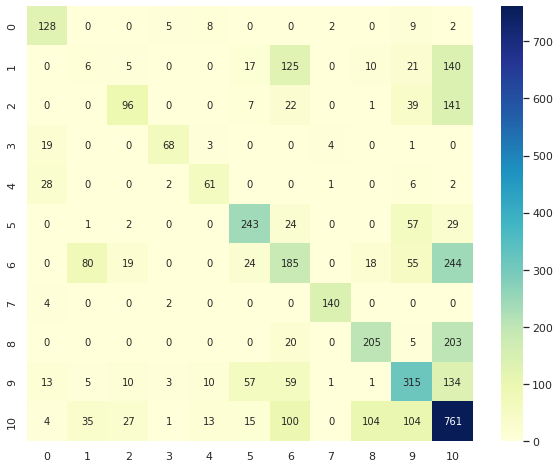

In [ ]:
plt.figure(figsize=(10, 8))
plt.rc('font', size=10)
sns.heatmap(cm,annot = True,cmap="YlGnBu",fmt=".0f")

In [ ]:
y_val.value_counts().sort_values(ascending = False)

10    1164
6      625
9      608
8      433
5      356
1      324
2      306
0      154
7      146
4      100
3       95
Name: Class, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
model_report = classification_report(y_val,predictions)
print(model_report)

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       154
           1       0.05      0.02      0.03       324
           2       0.60      0.31      0.41       306
           3       0.84      0.72      0.77        95
           4       0.64      0.61      0.63       100
           5       0.67      0.68      0.68       356
           6       0.35      0.30      0.32       625
           7       0.95      0.96      0.95       146
           8       0.60      0.47      0.53       433
           9       0.51      0.52      0.52       608
          10       0.46      0.65      0.54      1164

    accuracy                           0.51      4311
   macro avg       0.58      0.55      0.55      4311
weighted avg       0.50      0.51      0.50      4311



In [ ]:
accuracy_score(y_val,predictions)

0.5121781489213639

In [ ]:
X_train.shape

(10056, 14)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 20, 30,40], 'max_features': [3, 7, 11, 14]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [200, 100,300], 'max_features': [4, 8, 12]},
  ]

forest_reg = RandomForestClassifier(random_state=42)

grid_search_RF = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [3, 7, 11, 14],
                          'n_estimators': [10, 20, 30, 40]},
                         {'bootstrap': [False], 'max_features': [4, 8, 12],
                          'n_estimators': [200, 100, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search_RF.best_estimator_


RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=200,
                       random_state=42)

In [ ]:
feature_importances_RF = grid_search_RF.best_estimator_.feature_importances_
feature_importances_RF

array([0.08234744, 0.08742089, 0.08634157, 0.07766432, 0.09810454,
       0.10423949, 0.08572857, 0.06115691, 0.0808393 , 0.06208235,
       0.12040945, 0.00616529, 0.0356719 , 0.01182797])

In [ ]:
final_model = grid_search_RF.best_estimator_

predictions_RF = final_model.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report
model_report = classification_report(y_val,predictions_RF)
print(model_report)

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       154
           1       0.04      0.02      0.02       324
           2       0.56      0.35      0.43       306
           3       0.83      0.73      0.78        95
           4       0.63      0.59      0.61       100
           5       0.67      0.69      0.68       356
           6       0.35      0.31      0.32       625
           7       0.96      0.95      0.96       146
           8       0.59      0.49      0.53       433
           9       0.52      0.52      0.52       608
          10       0.47      0.63      0.54      1164

    accuracy                           0.51      4311
   macro avg       0.57      0.55      0.56      4311
weighted avg       0.50      0.51      0.50      4311



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
knn_clf = KNeighborsClassifier()
grid_search_KNN = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.301 total time=   0.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.324 total time=   0.1s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.300 total time=   0.1s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.307 total time=   0.2s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.294 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.320 total time=   0.1s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.323 total time=   0.1s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.325 total time=   0.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.330 total time=   0.1s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.319 total time=   0.1s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.322 total time=   0.2s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
final_model = grid_search_KNN.best_estimator_

predictions_KNN = final_model.predict(X_val)

In [ ]:
model_report = classification_report(y_val,predictions_KNN)
print(model_report)

              precision    recall  f1-score   support

           0       0.33      0.30      0.31       154
           1       0.04      0.04      0.04       324
           2       0.28      0.22      0.25       306
           3       0.54      0.23      0.32        95
           4       0.33      0.16      0.22       100
           5       0.59      0.46      0.51       356
           6       0.16      0.16      0.16       625
           7       0.73      0.82      0.77       146
           8       0.44      0.41      0.42       433
           9       0.34      0.36      0.35       608
          10       0.38      0.48      0.42      1164

    accuracy                           0.35      4311
   macro avg       0.38      0.33      0.34      4311
weighted avg       0.35      0.35      0.34      4311



# Test Model

**Get the Data**

In [ ]:
test_data= pd.read_csv("/content/test.csv")
music_test = test_data.drop(columns = ["id","Track Name","Artist Name"],axis =1 )

In [ ]:
music_test.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,52.0,0.522,0.726,4.0,-4.115,1,0.0383,0.348000,0.000005,0.1480,0.331,161.867,189587.0,4
1,69.0,0.754,0.449,4.0,-14.013,1,0.0615,0.724000,NaN,0.1620,0.973,82.751,211880.0,4
2,50.0,0.607,0.477,9.0,-12.904,1,0.0333,0.708000,NaN,0.2530,0.887,136.614,122600.0,4
3,40.0,0.484,0.872,1.0,-5.586,1,0.0559,0.000384,0.000672,0.1480,0.347,150.027,222208.0,4
4,64.0,0.639,0.843,11.0,-4.975,1,0.0362,0.052500,NaN,0.0854,0.528,126.047,217802.0,4


In [ ]:
music_test.isna().sum().sort_values(ascending = False)

instrumentalness      818
key                   402
Popularity             77
danceability            0
energy                  0
loudness                0
mode                    0
speechiness             0
acousticness            0
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [ ]:
prepared_Test_Data = full_transform.transform(music_test)
prepared_Test_Data = pd.DataFrame(prepared_Test_Data , columns = music_test.columns)

In [ ]:
prepared_Test_Data.isna().sum().sort_values(ascending = False)

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

**Setup test predictions**

In [ ]:
y_pred = RF_Cls.predict(prepared_Test_Data)
y_pred

array([10, 10, 10, ..., 10,  7, 10])

In [ ]:
submission = test_data[["id"]]

In [ ]:
submission["Class"] = y_pred

<ipython-input-75-1bc1919a17ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Class"] = y_pred


In [ ]:
submission

,id,Class
0,0,10
1,1,10
2,2,10
3,3,10
4,4,10
...,...,...
3595,3595,5
3596,3596,10
3597,3597,10
3598,3598,7


In [ ]:
submission.to_csv("submission.csv",index = None)